# Mailout dataset: EDA & pre-processing steps

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
  
%matplotlib inline


### my utils

from eda_utils import *

# 01. Load data

In [2]:
%%time
train = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', low_memory = False, index_col = 'LNR') 
train

CPU times: user 1.01 s, sys: 233 ms, total: 1.25 s
Wall time: 7.05 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,NaN,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,2,1.0,0.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,1.0,1.0,1.0,4.0,8.0,7.0,1,0,1,4
67629,-1,1.0,0.0,NaN,NaN,NaN,NaN,14.0,1.0,0.0,...,1.0,1.0,1.0,5.0,9.0,7.0,1,0,1,3
68273,1,1.0,16.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,1.0,2.0,1.0,2.0,9.0,7.0,1,0,1,4


In [3]:
%%time
test = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';', low_memory = False, index_col = 'LNR') 
test

CPU times: user 1.18 s, sys: 244 ms, total: 1.42 s
Wall time: 6.44 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,0.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,0.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,0.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67615,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1
67938,0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
67942,-1,1.0,16.0,14.0,17.0,NaN,NaN,15.0,1.0,0.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3


# 02. Features

## 02.01. Intro

CPU times: user 223 ms, sys: 11.2 ms, total: 234 ms
Wall time: 494 ms


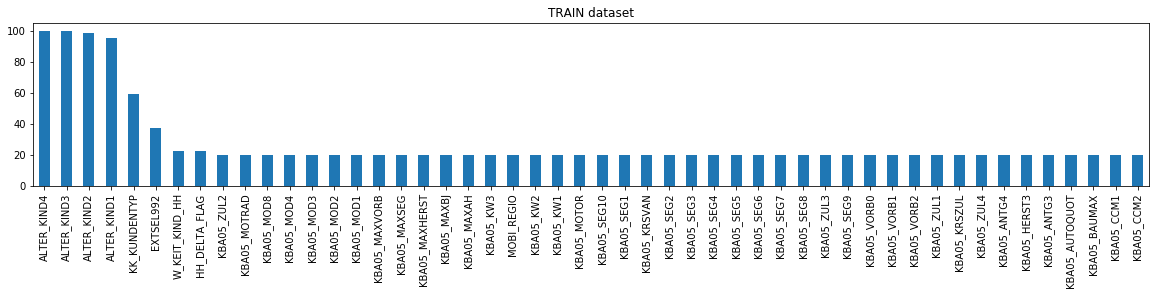

In [4]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)
empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

[]

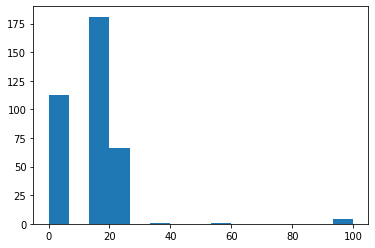

In [5]:
plt.hist(empty_cells_train,bins=15)
plt.plot()

CPU times: user 143 ms, sys: 15.9 ms, total: 159 ms
Wall time: 158 ms


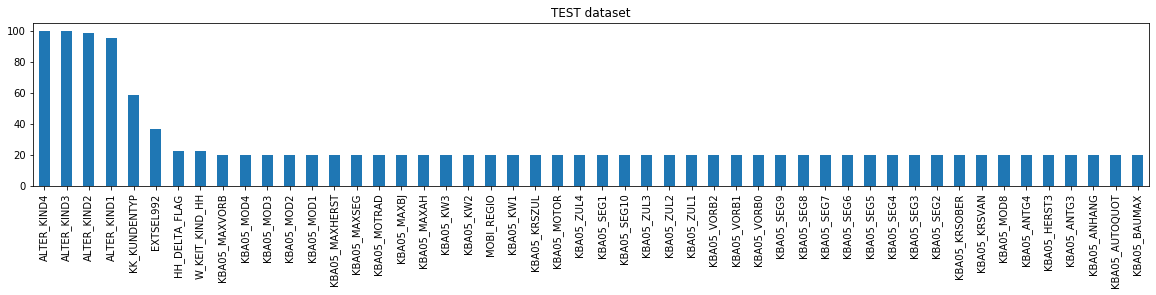

In [6]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

[]

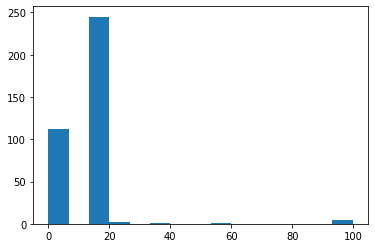

In [7]:
plt.hist(empty_cells_test,bins=15)
plt.plot()

In [8]:
missingness_threshold_percentage=30

In [9]:
print(np.sum(empty_cells_train>=missingness_threshold_percentage)
      ,np.sum(empty_cells_test>=missingness_threshold_percentage))

6 6


## 02.02. Undefined features

In [10]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [11]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

94 TRAIN dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


In [12]:
### metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [13]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

93 TEST dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


in "TRAIN" we have one additional column which lacks metadata information, but we know what is that column, it is a `RESPONSE` column,  that states whether or not a person became a customer of the company following the marketing campaign.

## 02.03. Missing features: correction

In [14]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [15]:

test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [16]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )



56 TRAIN dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


In [17]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

55 TEST dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


## 02.04. Feature missingness filtering

In [18]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 103 ms


In [19]:
%%time
features_to_drop_train =list( (empty_cells_train[empty_cells_train>missingness_threshold_percentage]).index.values)
train.drop(labels=features_to_drop_train,inplace=True,axis='columns')

print("Dropped {} TRAIN columns".format(len(features_to_drop_train)))

Dropped 31 TRAIN columns
CPU times: user 29.5 ms, sys: 28.3 ms, total: 57.8 ms
Wall time: 56.4 ms


CPU times: user 157 ms, sys: 0 ns, total: 157 ms
Wall time: 156 ms


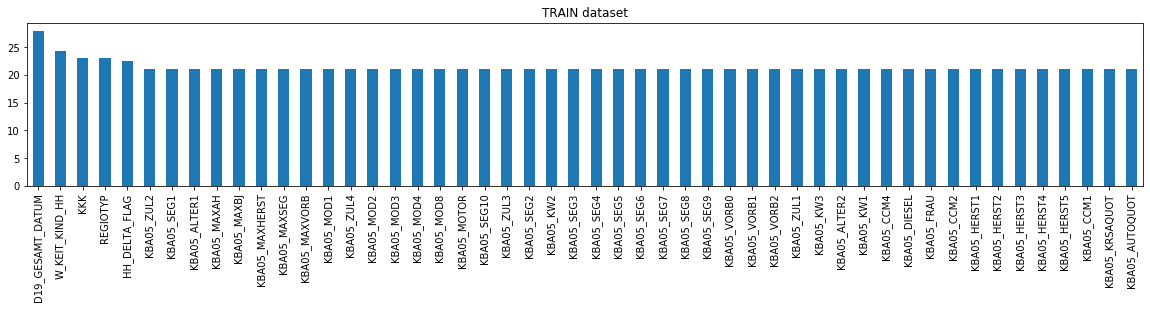

In [20]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

In [21]:
%%time
features_to_drop_test =list( (empty_cells_test[empty_cells_test>missingness_threshold_percentage]).index.values)
test.drop(labels=features_to_drop_test,inplace=True,axis='columns')

print("Dropped {} TEST columns".format(len(features_to_drop_test)))

Dropped 31 TEST columns
CPU times: user 38 ms, sys: 20.5 ms, total: 58.6 ms
Wall time: 57.1 ms


CPU times: user 151 ms, sys: 0 ns, total: 151 ms
Wall time: 150 ms


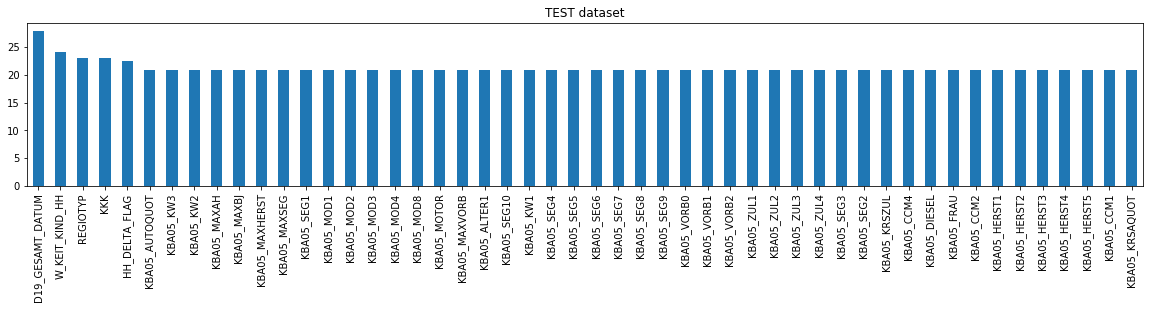

In [22]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

In [23]:
assert len(features_to_drop_test) == len(features_to_drop_train)

assert len(set(features_to_drop_test).intersection((set(features_to_drop_train)))) == len(features_to_drop_test)

We see that both for train and test we **removed 31 columns**, and these columns are THE SAME for both datasets

---
# 03. Missing rows

CPU times: user 156 ms, sys: 51 µs, total: 156 ms
Wall time: 351 ms


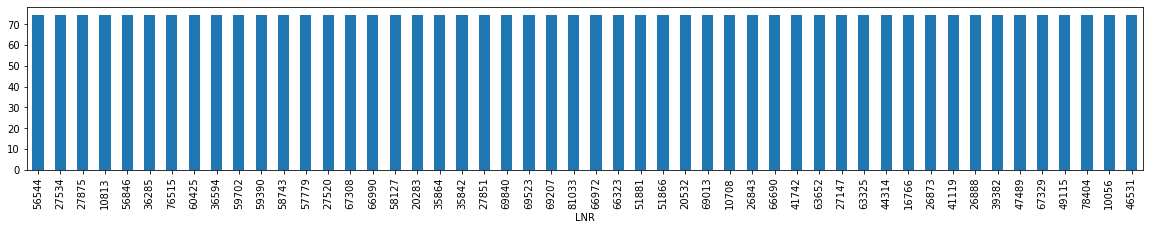

In [24]:
%%time
empty_rows_train = pd.isnull(train).sum(axis=1)*100.0/train.shape[1]
empty_rows_train = empty_rows_train.sort_values(ascending=False)
empty_rows_train[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

CPU times: user 147 ms, sys: 4.07 ms, total: 151 ms
Wall time: 149 ms


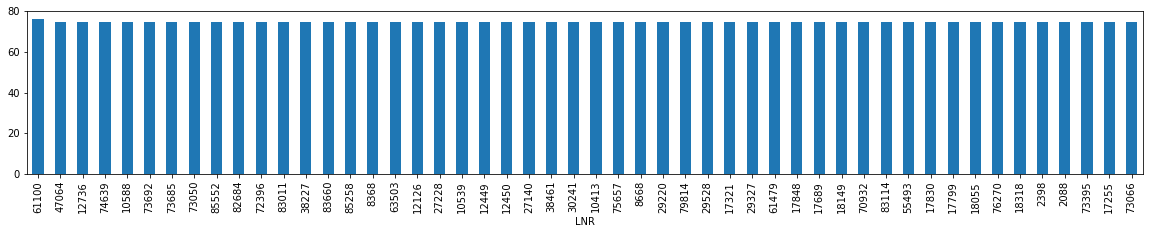

In [25]:
%%time
empty_rows_test = pd.isnull(test).sum(axis=1)*100.0/test.shape[1]
empty_rows_test = empty_rows_test.sort_values(ascending=False)
empty_rows_test[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

In [26]:
row_missingness_threshold_percentage = 90 

In [27]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_train>row_missingness_threshold_percentage)*100/train.shape[0]

0.0

In [28]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_test>row_missingness_threshold_percentage)*100/test.shape[0]

0.0

We see that we have approximately 18% of subjects in the dataset that have missingness above defined threshold of `50%`. I might **re-visit** this threshold later, depending on the overall score of the subsequent classifier.

**Re-visit!**: Because the training dataset looses relative a big chunk of information due to missingness, and subsequent model suffers from loss of positive cases (which are imbalanced), I decided to increase the threshold to 90%, which in fact **doesn't filter for missing rows**, as all samples have at least 10% columns present. Subsequent Bayesian imputation might address this problem.

## We cannot remove `test` cases, final predictions have to be made for ALL 42833 TEST CASES!!!

[]

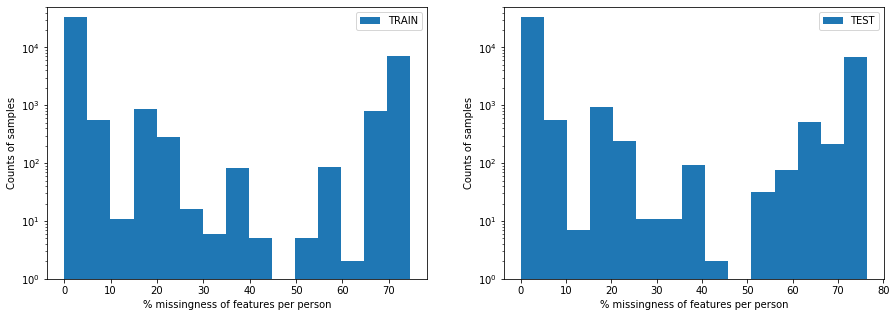

In [29]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(empty_rows_train,bins=15,label="TRAIN",log=True)
axs[0].set_ylim(1e0,5e4)
axs[0].legend()
axs[0].set_xlabel("% missingness of features per person")
axs[0].set_ylabel("Counts of samples")

axs[1].hist(empty_rows_test,bins=15,label="TEST",log=True)
axs[1].set_ylim(1e0,5e4)
axs[1].legend()
axs[1].set_xlabel("% missingness of features per person")
axs[1].set_ylabel("Counts of samples")

plt.plot()

In [30]:
%%time
samples_to_drop_train =list( (empty_rows_train[empty_rows_train>row_missingness_threshold_percentage]).index.values)
try:
    train.drop(labels=samples_to_drop_train,inplace=True,axis='index')
except KeyError:
    print("Already deleted")

print("{} TRAIN samples dropped".format(len(samples_to_drop_train)))

0 TRAIN samples dropped
CPU times: user 36.5 ms, sys: 28.9 ms, total: 65.4 ms
Wall time: 64.6 ms


In [34]:
assert test.shape[0]==42833

# 04. Data types and & feature encoding

I am going to apply the SAME logic as in the previous notebooks 01 and 02. Except here I have additional column only for TRAIN dataset `RESPONSE` that is assumed to be a binary variable, and is already encoded as 0/1 (see below)

In [32]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 


test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [33]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

51 TRAIN dataset features lacking metadata information, while there are 30 features not used by provided dataset. 
50 TEST dataset features lacking metadata information, while there are 30 features not used by provided dataset. 



## a. concatenating train/test
Our data still has lots of missing entries. Analogically to a notebook in `Unsupervised/Unsupervised_Customer_Segmentation.ipynb` I am going to use a IterativeImputer in an attempt to ?

In [35]:
train['dataset']='train'
test['dataset']='test'

joint_dataset = pd.concat([train,test])

metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

joint_dataset,missing_metadata_annotations_joint,not_present_features_joint = \
 unknown_to_nan(joint_dataset, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 


Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [36]:

print("{} JOINT dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_joint), len(not_present_features_joint) ) )


52 JOINT dataset features lacking metadata information, while there are 30 features not used by provided dataset. 


In [37]:

missing_metadata_feature_info =  {}
missing_metadata_feature_info['Attribute'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations_joint:
    unique_vals =  np.unique(joint_dataset[f].dropna() )
    
    missing_metadata_feature_info['Attribute'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)


missing_metadata_feature_info_joint = missing_metadata_feature_info
missing_metadata_feature_info_joint

,Attribute,unique_counts,unique_vals
49,EINGEFUEGT_AM,2136,"[1991-08-30 00:00:00, 1992-02-10 00:00:00, 199..."
41,ANZ_STATISTISCHE_HAUSHALTE,200,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
29,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
47,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
19,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991...."
24,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
13,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
3,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
7,D19_VERSI_ONLINE_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


As with `AZDIAS` and `Customers` dataset, as here we need to remove `EINGEFUEGT_AM` column, and encode `ANZ_STATISTISCHE_HAUSHALTE` as numerical and the remaining features to be encoded as categorical.

In [38]:
missing_metadata_feature_info_joint['Type']= 'categorical' # categorical as default

##### dropping EINGEFUEGT_AM_idx 

### from `missing_metadata_feature_info`
EINGEFUEGT_AM_idx = missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info_joint.drop(axis='index', inplace=True, index = EINGEFUEGT_AM_idx )

# Manually set specific features to numerical upon inspection
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='ANZ_STATISTISCHE_HAUSHALTE', 'Type'] = 'numerical'
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='VERDICHTUNGSRAUM', 'Type'] = 'numerical'
missing_metadata_feature_info_joint.loc[missing_metadata_feature_info_joint.Attribute=='EINGEZOGENAM_HH_JAHR', 'Type'] = 'numerical'


### from joint DATASET remove following columns: EINGEFUEGT_AM
try:
    joint_dataset.drop(columns='EINGEFUEGT_AM',inplace=True)
except KeyError:
    print("EINGEFUEGT_AM already deleted from train")

    
missing_metadata_feature_info_joint.head()

,Attribute,unique_counts,unique_vals,Type
41,ANZ_STATISTISCHE_HAUSHALTE,200,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
29,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
47,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK...",categorical
19,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991....",numerical
24,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical


(array([246.,   0.,   0.,   0.,   0.,  79.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

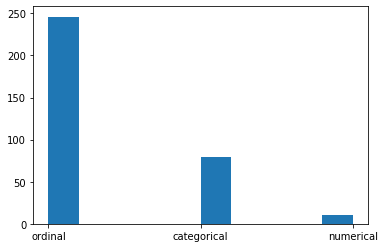

In [39]:
missing_metadata_feature_info_joint = missing_metadata_feature_info_joint[['Attribute','Type']]

all_feature_types = pd.read_csv('metadata_feature_types.tsv',sep="\t").dropna()
all_feature_types = pd.concat([all_feature_types,missing_metadata_feature_info_joint])

# must be in joint dataset
all_feature_types.index = all_feature_types['Attribute']
# features that have filtered AZDIAS entry
all_feature_types = all_feature_types.loc[ set(all_feature_types['Attribute'] ).intersection( (set(joint_dataset.columns  )))  ]

plt.hist(all_feature_types['Type'])


**NOTE**: below I am copying some code from `EDA/03_Concatenate_and_Impute.ipynb`

It is basically a boilerplate to replace values for categories that in fact code for the same thing

## b. standardizing selected features

In [40]:

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


joint_dataset['LP_FAMILIE_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(7,6,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(8,6,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(10,9,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(11,9,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(0,np.nan,inplace=True)


print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


Before standarization we have classes: [0. 1. 2. 3. 4. 5.]
After standarization we have classes: [1. 2. 3.]


In [41]:
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))

joint_dataset['LP_STATUS_GROB'].replace(2,1,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_STATUS_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(7,6,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(9,8,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))


Before standarization we have classes: [1. 2. 3. 4. 5.]
After standarization we have classes: [1. 3.]


In [42]:
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM']= joint_dataset['PRAEGENDE_JUGENDJAHRE']

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE'].dropna())))

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(2,1,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(4,3,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(6,5,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(7,5,inplace=True)
 
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(9,8,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(11,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(12,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(13,10,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(15,14,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].dropna())))


Before standarization we have classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
After standarization we have classes: [ 1.  3.  5.  8. 10. 14.]


In [43]:
joint_dataset['CAMEO_DEUINTL_2015_SIM'] = joint_dataset['CAMEO_DEUINTL_2015']

 
    
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('12','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('13','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('14','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('15','11',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('22','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('23','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('24','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('25','21',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('32','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('33','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('34','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('35','31',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('42','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('43','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('44','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('45','41',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('52','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('53','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('54','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('55','51',inplace=True)
    
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('XX',np.nan,inplace=True)    
    
print("After standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))


Before standarization we have classes: ['12' '13' '14' '15' '22' '23' '24' '25' '31' '32' '33' '34' '35' '41'
 '43' '44' '45' '51' '52' '54' '55' 'XX']
After standarization we have classes: ['11' '21' '31' '41' '51']


## c. encoding categorical values

In [44]:
categorical_features = list(all_feature_types[all_feature_types['Type']=='categorical']['Attribute'])

categorical_features.append('dataset')
len(categorical_features)

80

66


(array([59., 10.,  6.,  1.,  0.,  1.,  0.,  1.,  0.,  2.]),
 array([ 2. ,  6.3, 10.6, 14.9, 19.2, 23.5, 27.8, 32.1, 36.4, 40.7, 45. ]),
 <a list of 10 Patch objects>)

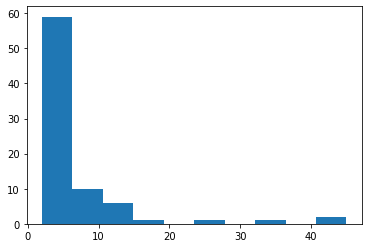

In [45]:
categorical_features_count = {'feature': [], 'counts':[]}

for f in categorical_features:

    categorical_features_count['feature'].append(f)
    
    categorical_features_count['counts'].append(len(np.unique(joint_dataset[f].dropna())  ) )


categorical_features_count = pd.DataFrame(categorical_features_count)

categorical_features_to_one_hot = list( categorical_features_count[categorical_features_count['counts']>2]['feature'])
print(len(categorical_features_to_one_hot))

plt.hist(categorical_features_count['counts'])

In [46]:
print(joint_dataset.shape)
joint_dataset = pd.get_dummies(joint_dataset,columns=categorical_features_to_one_hot)
print(joint_dataset.shape)

(85795, 337)
(85795, 811)


## d. encode non-numerical (categorical and ordinal) features

In [47]:
numerical_features = list(all_feature_types[all_feature_types['Type']=='numerical']['Attribute'])
not_numerical_features  = [f for f in joint_dataset.columns if f not in numerical_features]


In [48]:
from sklearn.preprocessing import LabelEncoder
LabelEncoders = { x: LabelEncoder() for x in not_numerical_features  }

for idx,feature in enumerate(not_numerical_features):
    print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature ))
    
    # NA mask - label encoder cannot handle missing values (i.e. NAs)
    not_na_mask =  joint_dataset[feature].notnull() # FALSE for NA, TRUE for some value
    
    joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )

1/801: BALLRAUM


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2/801: CAMEO_DEUG_2015
3/801: CAMEO_DEUINTL_2015
4/801: D19_BANKEN_DIREKT_RZ
5/801: D19_BANKEN_GROSS_RZ
6/801: D19_BANKEN_LOKAL_RZ
7/801: D19_BANKEN_ONLINE_QUOTE_12
8/801: D19_BANKEN_REST_RZ
9/801: D19_BEKLEIDUNG_GEH_RZ
10/801: D19_BEKLEIDUNG_REST_RZ
11/801: D19_BILDUNG_RZ
12/801: D19_BIO_OEKO_RZ
13/801: D19_BUCH_RZ
14/801: D19_DIGIT_SERV_RZ
15/801: D19_DROGERIEARTIKEL_RZ
16/801: D19_ENERGIE_RZ
17/801: D19_FREIZEIT_RZ
18/801: D19_GARTEN_RZ
19/801: D19_GESAMT_DATUM
20/801: D19_GESAMT_ONLINE_QUOTE_12
21/801: D19_HANDWERK_RZ
22/801: D19_HAUS_DEKO_RZ
23/801: D19_KINDERARTIKEL_RZ
24/801: D19_KOSMETIK_RZ
25/801: D19_LEBENSMITTEL_RZ
26/801: D19_LOTTO_RZ
27/801: D19_NAHRUNGSERGAENZUNG_RZ
28/801: D19_RATGEBER_RZ
29/801: D19_REISEN_RZ
30/801: D19_SAMMELARTIKEL_RZ
31/801: D19_SCHUHE_RZ
32/801: D19_SONSTIGE_RZ
33/801: D19_TECHNIK_RZ
34/801: D19_TELKO_MOBILE_RZ
35/801: D19_TELKO_REST_RZ
36/801: D19_TIERARTIKEL_RZ
37/801: D19_VERSAND_ONLINE_QUOTE_12
38/801: D19_VERSAND_REST_RZ
39/801: D19_VERSICHERU

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

265/801: VK_DISTANZ_4.0
266/801: VK_DISTANZ_5.0
267/801: VK_DISTANZ_6.0
268/801: VK_DISTANZ_7.0
269/801: VK_DISTANZ_8.0
270/801: VK_DISTANZ_9.0
271/801: VK_DISTANZ_10.0
272/801: VK_DISTANZ_11.0
273/801: VK_DISTANZ_12.0
274/801: VK_DISTANZ_13.0
275/801: D19_VERSI_DATUM_1
276/801: D19_VERSI_DATUM_2
277/801: D19_VERSI_DATUM_3
278/801: D19_VERSI_DATUM_4
279/801: D19_VERSI_DATUM_5
280/801: D19_VERSI_DATUM_6
281/801: D19_VERSI_DATUM_7
282/801: D19_VERSI_DATUM_8
283/801: D19_VERSI_DATUM_9
284/801: D19_VERSI_DATUM_10
285/801: D19_VERSI_ONLINE_QUOTE_12_0.0
286/801: D19_VERSI_ONLINE_QUOTE_12_3.0
287/801: D19_VERSI_ONLINE_QUOTE_12_5.0
288/801: D19_VERSI_ONLINE_QUOTE_12_10.0
289/801: ZABEOTYP_1
290/801: ZABEOTYP_2
291/801: ZABEOTYP_3
292/801: ZABEOTYP_4
293/801: ZABEOTYP_5
294/801: ZABEOTYP_6
295/801: KBA13_BAUMAX_1.0
296/801: KBA13_BAUMAX_2.0
297/801: KBA13_BAUMAX_3.0
298/801: KBA13_BAUMAX_4.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

299/801: KBA13_BAUMAX_5.0
300/801: PRAEGENDE_JUGENDJAHRE_1.0
301/801: PRAEGENDE_JUGENDJAHRE_2.0
302/801: PRAEGENDE_JUGENDJAHRE_3.0
303/801: PRAEGENDE_JUGENDJAHRE_4.0
304/801: PRAEGENDE_JUGENDJAHRE_5.0
305/801: PRAEGENDE_JUGENDJAHRE_6.0
306/801: PRAEGENDE_JUGENDJAHRE_7.0
307/801: PRAEGENDE_JUGENDJAHRE_8.0
308/801: PRAEGENDE_JUGENDJAHRE_9.0
309/801: PRAEGENDE_JUGENDJAHRE_10.0
310/801: PRAEGENDE_JUGENDJAHRE_11.0
311/801: PRAEGENDE_JUGENDJAHRE_12.0
312/801: PRAEGENDE_JUGENDJAHRE_13.0
313/801: PRAEGENDE_JUGENDJAHRE_14.0
314/801: PRAEGENDE_JUGENDJAHRE_15.0
315/801: ANZ_KINDER_0.0
316/801: ANZ_KINDER_1.0
317/801: ANZ_KINDER_2.0
318/801: ANZ_KINDER_3.0
319/801: ANZ_KINDER_4.0
320/801: ANZ_KINDER_5.0
321/801: ANZ_KINDER_6.0
322/801: ANZ_KINDER_7.0
323/801: KBA05_MAXHERST_1.0
324/801: KBA05_MAXHERST_2.0
325/801: KBA05_MAXHERST_3.0
326/801: KBA05_MAXHERST_4.0
327/801: KBA05_MAXHERST_5.0
328/801: CJT_TYP_2_1.0
329/801: CJT_TYP_2_2.0
330/801: CJT_TYP_2_3.0
331/801: CJT_TYP_2_4.0
332/801: CJT_TYP_2_

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

334/801: KBA05_HERSTTEMP_2.0
335/801: KBA05_HERSTTEMP_3.0
336/801: KBA05_HERSTTEMP_4.0
337/801: KBA05_HERSTTEMP_5.0
338/801: KOMBIALTER_1
339/801: KOMBIALTER_2
340/801: KOMBIALTER_3
341/801: KOMBIALTER_4
342/801: KOMBIALTER_9
343/801: WOHNLAGE_0.0
344/801: WOHNLAGE_1.0
345/801: WOHNLAGE_2.0
346/801: WOHNLAGE_3.0
347/801: WOHNLAGE_4.0
348/801: WOHNLAGE_5.0
349/801: WOHNLAGE_7.0
350/801: WOHNLAGE_8.0
351/801: KBA13_ANTG2_0.0
352/801: KBA13_ANTG2_1.0
353/801: KBA13_ANTG2_2.0
354/801: KBA13_ANTG2_3.0
355/801: KBA13_ANTG2_4.0
356/801: LP_FAMILIE_GROB_1.0
357/801: LP_FAMILIE_GROB_2.0
358/801: LP_FAMILIE_GROB_3.0
359/801: MOBI_RASTER_1.0
360/801: MOBI_RASTER_2.0
361/801: MOBI_RASTER_3.0
362/801: MOBI_RASTER_4.0
363/801: MOBI_RASTER_5.0
364/801: MOBI_RASTER_6.0
365/801: SHOPPER_TYP_0.0
366/801: SHOPPER_TYP_1.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

367/801: SHOPPER_TYP_2.0
368/801: SHOPPER_TYP_3.0
369/801: GEMEINDETYP_11.0
370/801: GEMEINDETYP_12.0
371/801: GEMEINDETYP_21.0
372/801: GEMEINDETYP_22.0
373/801: GEMEINDETYP_30.0
374/801: GEMEINDETYP_40.0
375/801: GEMEINDETYP_50.0
376/801: ALTERSKATEGORIE_GROB_1
377/801: ALTERSKATEGORIE_GROB_2
378/801: ALTERSKATEGORIE_GROB_3
379/801: ALTERSKATEGORIE_GROB_4
380/801: ALTERSKATEGORIE_GROB_9
381/801: LP_FAMILIE_FEIN_0.0
382/801: LP_FAMILIE_FEIN_1.0
383/801: LP_FAMILIE_FEIN_2.0
384/801: LP_FAMILIE_FEIN_3.0
385/801: LP_FAMILIE_FEIN_4.0
386/801: LP_FAMILIE_FEIN_5.0
387/801: LP_FAMILIE_FEIN_6.0
388/801: LP_FAMILIE_FEIN_7.0
389/801: LP_FAMILIE_FEIN_8.0
390/801: LP_FAMILIE_FEIN_9.0
391/801: LP_FAMILIE_FEIN_10.0
392/801: LP_FAMILIE_FEIN_11.0
393/801: D19_KONSUMTYP_1.0
394/801: D19_KONSUMTYP_2.0
395/801: D19_KONSUMTYP_3.0
396/801: D19_KONSUMTYP_4.0
397/801: D19_KONSUMTYP_5.0
398/801: D19_KONSUMTYP_6.0
399/801: D19_KONSUMTYP_9.0
400/801: GEBAEUDETYP_1.0
401/801: GEBAEUDETYP_2.0
402/801: GEBAEUDETY

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

414/801: RETOURTYP_BK_S_4.0
415/801: RETOURTYP_BK_S_5.0
416/801: VK_DHT4A_1.0
417/801: VK_DHT4A_2.0
418/801: VK_DHT4A_3.0
419/801: VK_DHT4A_4.0
420/801: VK_DHT4A_5.0
421/801: VK_DHT4A_6.0
422/801: VK_DHT4A_7.0
423/801: VK_DHT4A_8.0
424/801: VK_DHT4A_9.0
425/801: VK_DHT4A_10.0
426/801: VK_DHT4A_11.0
427/801: D19_VERSI_ONLINE_DATUM_1
428/801: D19_VERSI_ONLINE_DATUM_2
429/801: D19_VERSI_ONLINE_DATUM_3
430/801: D19_VERSI_ONLINE_DATUM_4
431/801: D19_VERSI_ONLINE_DATUM_5
432/801: D19_VERSI_ONLINE_DATUM_6
433/801: D19_VERSI_ONLINE_DATUM_7
434/801: D19_VERSI_ONLINE_DATUM_8
435/801: D19_VERSI_ONLINE_DATUM_9
436/801: D19_VERSI_ONLINE_DATUM_10
437/801: KBA13_KMH_210_1.0
438/801: KBA13_KMH_210_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

439/801: KBA13_KMH_210_3.0
440/801: KBA13_KMH_210_4.0
441/801: KBA13_KMH_210_5.0
442/801: D19_VERSI_OFFLINE_DATUM_1
443/801: D19_VERSI_OFFLINE_DATUM_2
444/801: D19_VERSI_OFFLINE_DATUM_3
445/801: D19_VERSI_OFFLINE_DATUM_4
446/801: D19_VERSI_OFFLINE_DATUM_5
447/801: D19_VERSI_OFFLINE_DATUM_6
448/801: D19_VERSI_OFFLINE_DATUM_7
449/801: D19_VERSI_OFFLINE_DATUM_8
450/801: D19_VERSI_OFFLINE_DATUM_9
451/801: D19_VERSI_OFFLINE_DATUM_10
452/801: CJT_TYP_4_1.0
453/801: CJT_TYP_4_2.0
454/801: CJT_TYP_4_3.0
455/801: CJT_TYP_4_4.0
456/801: CJT_TYP_4_5.0
457/801: LP_LEBENSPHASE_GROB_0.0
458/801: LP_LEBENSPHASE_GROB_1.0
459/801: LP_LEBENSPHASE_GROB_2.0
460/801: LP_LEBENSPHASE_GROB_3.0
461/801: LP_LEBENSPHASE_GROB_4.0
462/801: LP_LEBENSPHASE_GROB_5.0
463/801: LP_LEBENSPHASE_GROB_6.0
464/801: LP_LEBENSPHASE_GROB_7.0
465/801: LP_LEBENSPHASE_GROB_8.0
466/801: LP_LEBENSPHASE_GROB_9.0
467/801: LP_LEBENSPHASE_GROB_10.0
468/801: LP_LEBENSPHASE_GROB_11.0
469/801: LP_LEBENSPHASE_GROB_12.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

470/801: VHA_0.0
471/801: VHA_1.0
472/801: VHA_2.0
473/801: VHA_3.0
474/801: VHA_4.0
475/801: VHA_5.0
476/801: D19_SOZIALES_0.0
477/801: D19_SOZIALES_1.0
478/801: D19_SOZIALES_2.0
479/801: D19_SOZIALES_3.0
480/801: D19_SOZIALES_4.0
481/801: D19_SOZIALES_5.0
482/801: UMFELD_JUNG_1.0
483/801: UMFELD_JUNG_2.0
484/801: UMFELD_JUNG_3.0
485/801: UMFELD_JUNG_4.0
486/801: UMFELD_JUNG_5.0
487/801: FINANZTYP_1
488/801: FINANZTYP_2
489/801: FINANZTYP_3
490/801: FINANZTYP_4
491/801: FINANZTYP_5
492/801: FINANZTYP_6
493/801: KBA13_ANTG3_0.0
494/801: KBA13_ANTG3_1.0
495/801: KBA13_ANTG3_2.0
496/801: KBA13_ANTG3_3.0
497/801: VHN_0.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

498/801: VHN_1.0
499/801: VHN_2.0
500/801: VHN_3.0
501/801: VHN_4.0
502/801: UMFELD_ALT_1.0
503/801: UMFELD_ALT_2.0
504/801: UMFELD_ALT_3.0
505/801: UMFELD_ALT_4.0
506/801: UMFELD_ALT_5.0
507/801: VK_ZG11_1.0
508/801: VK_ZG11_2.0
509/801: VK_ZG11_3.0
510/801: VK_ZG11_4.0
511/801: VK_ZG11_5.0
512/801: VK_ZG11_6.0
513/801: VK_ZG11_7.0
514/801: VK_ZG11_8.0
515/801: VK_ZG11_9.0
516/801: VK_ZG11_10.0
517/801: VK_ZG11_11.0
518/801: GEBAEUDETYP_RASTER_1.0
519/801: GEBAEUDETYP_RASTER_2.0
520/801: GEBAEUDETYP_RASTER_3.0
521/801: GEBAEUDETYP_RASTER_4.0
522/801: GEBAEUDETYP_RASTER_5.0
523/801: GFK_URLAUBERTYP_1.0
524/801: GFK_URLAUBERTYP_2.0
525/801: GFK_URLAUBERTYP_3.0
526/801: GFK_URLAUBERTYP_4.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

527/801: GFK_URLAUBERTYP_5.0
528/801: GFK_URLAUBERTYP_6.0
529/801: GFK_URLAUBERTYP_7.0
530/801: GFK_URLAUBERTYP_8.0
531/801: GFK_URLAUBERTYP_9.0
532/801: GFK_URLAUBERTYP_10.0
533/801: GFK_URLAUBERTYP_11.0
534/801: GFK_URLAUBERTYP_12.0
535/801: KBA13_ANTG4_0.0
536/801: KBA13_ANTG4_1.0
537/801: KBA13_ANTG4_2.0
538/801: ARBEIT_1.0
539/801: ARBEIT_2.0
540/801: ARBEIT_3.0
541/801: ARBEIT_4.0
542/801: ARBEIT_5.0
543/801: ARBEIT_9.0
544/801: CJT_TYP_3_1.0
545/801: CJT_TYP_3_2.0
546/801: CJT_TYP_3_3.0
547/801: CJT_TYP_3_4.0
548/801: CJT_TYP_3_5.0
549/801: ALTERSKATEGORIE_FEIN_0.0
550/801: ALTERSKATEGORIE_FEIN_2.0
551/801: ALTERSKATEGORIE_FEIN_3.0
552/801: ALTERSKATEGORIE_FEIN_4.0
553/801: ALTERSKATEGORIE_FEIN_5.0
554/801: ALTERSKATEGORIE_FEIN_6.0
555/801: ALTERSKATEGORIE_FEIN_7.0
556/801: ALTERSKATEGORIE_FEIN_8.0
557/801: ALTERSKATEGORIE_FEIN_9.0
558/801: ALTERSKATEGORIE_FEIN_10.0
559/801: ALTERSKATEGORIE_FEIN_11.0
560/801: ALTERSKATEGORIE_FEIN_12.0
561/801: ALTERSKATEGORIE_FEIN_13.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

562/801: ALTERSKATEGORIE_FEIN_14.0
563/801: ALTERSKATEGORIE_FEIN_15.0
564/801: ALTERSKATEGORIE_FEIN_16.0
565/801: ALTERSKATEGORIE_FEIN_17.0
566/801: ALTERSKATEGORIE_FEIN_18.0
567/801: ALTERSKATEGORIE_FEIN_19.0
568/801: ALTERSKATEGORIE_FEIN_20.0
569/801: ALTERSKATEGORIE_FEIN_21.0
570/801: ALTERSKATEGORIE_FEIN_22.0
571/801: ALTERSKATEGORIE_FEIN_23.0
572/801: ALTERSKATEGORIE_FEIN_24.0
573/801: ALTERSKATEGORIE_FEIN_25.0
574/801: KBA05_MODTEMP_1.0
575/801: KBA05_MODTEMP_2.0
576/801: KBA05_MODTEMP_3.0
577/801: KBA05_MODTEMP_4.0
578/801: KBA05_MODTEMP_5.0
579/801: KBA05_MODTEMP_6.0
580/801: KBA13_HHZ_1.0
581/801: KBA13_HHZ_2.0
582/801: KBA13_HHZ_3.0
583/801: KBA13_HHZ_4.0
584/801: KBA13_HHZ_5.0
585/801: STRUKTURTYP_1.0
586/801: STRUKTURTYP_2.0
587/801: STRUKTURTYP_3.0
588/801: CJT_TYP_6_1.0
589/801: CJT_TYP_6_2.0
590/801: CJT_TYP_6_3.0
591/801: CJT_TYP_6_4.0
592/801: CJT_TYP_6_5.0
593/801: CJT_TYP_1_1.0
594/801: CJT_TYP_1_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

595/801: CJT_TYP_1_3.0
596/801: CJT_TYP_1_4.0
597/801: CJT_TYP_1_5.0
598/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_DIREKT
599/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_GROSS
600/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL
601/801: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_REST
602/801: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH
603/801: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_REST
604/801: D19_LETZTER_KAUF_BRANCHE_D19_BILDUNG
605/801: D19_LETZTER_KAUF_BRANCHE_D19_BIO_OEKO
606/801: D19_LETZTER_KAUF_BRANCHE_D19_BUCH_CD
607/801: D19_LETZTER_KAUF_BRANCHE_D19_DIGIT_SERV
608/801: D19_LETZTER_KAUF_BRANCHE_D19_DROGERIEARTIKEL
609/801: D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE
610/801: D19_LETZTER_KAUF_BRANCHE_D19_FREIZEIT
611/801: D19_LETZTER_KAUF_BRANCHE_D19_GARTEN
612/801: D19_LETZTER_KAUF_BRANCHE_D19_HANDWERK
613/801: D19_LETZTER_KAUF_BRANCHE_D19_HAUS_DEKO
614/801: D19_LETZTER_KAUF_BRANCHE_D19_KINDERARTIKEL
615/801: D19_LETZTER_KAUF_BRANCHE_D19_KOSMETIK
616/801: D19_LETZTER_KAUF_BRANCHE_D19_LEBENSMI

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

630/801: D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN
631/801: D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT
632/801: D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST
633/801: FIRMENDICHTE_1.0
634/801: FIRMENDICHTE_2.0
635/801: FIRMENDICHTE_3.0
636/801: FIRMENDICHTE_4.0
637/801: FIRMENDICHTE_5.0
638/801: RT_SCHNAEPPCHEN_1.0
639/801: RT_SCHNAEPPCHEN_2.0
640/801: RT_SCHNAEPPCHEN_3.0
641/801: RT_SCHNAEPPCHEN_4.0
642/801: RT_SCHNAEPPCHEN_5.0
643/801: CJT_KATALOGNUTZER_1.0
644/801: CJT_KATALOGNUTZER_2.0
645/801: CJT_KATALOGNUTZER_3.0
646/801: CJT_KATALOGNUTZER_4.0
647/801: CJT_KATALOGNUTZER_5.0
648/801: KBA13_ANTG1_0.0
649/801: KBA13_ANTG1_1.0
650/801: KBA13_ANTG1_2.0
651/801: KBA13_ANTG1_3.0
652/801: KBA13_ANTG1_4.0
653/801: NATIONALITAET_KZ_1.0
654/801: NATIONALITAET_KZ_2.0
655/801: NATIONALITAET_KZ_3.0
656/801: D19_KONSUMTYP_MAX_1
657/801: D19_KONSUMTYP_MAX_2
658/801: D19_KONSUMTYP_MAX_3
659/801: D19_KONSUMTYP_MAX_4
660/801: D19_KONSUMTYP_MAX_8
661/801: D19_KONSUMTYP_MAX_9
662/801: CAMEO_DEU_2015_

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

664/801: CAMEO_DEU_2015_1C
665/801: CAMEO_DEU_2015_1D
666/801: CAMEO_DEU_2015_1E
667/801: CAMEO_DEU_2015_2A
668/801: CAMEO_DEU_2015_2B
669/801: CAMEO_DEU_2015_2C
670/801: CAMEO_DEU_2015_2D
671/801: CAMEO_DEU_2015_3A
672/801: CAMEO_DEU_2015_3B
673/801: CAMEO_DEU_2015_3C
674/801: CAMEO_DEU_2015_3D
675/801: CAMEO_DEU_2015_4A
676/801: CAMEO_DEU_2015_4B
677/801: CAMEO_DEU_2015_4C
678/801: CAMEO_DEU_2015_4D
679/801: CAMEO_DEU_2015_4E
680/801: CAMEO_DEU_2015_5A
681/801: CAMEO_DEU_2015_5B
682/801: CAMEO_DEU_2015_5C
683/801: CAMEO_DEU_2015_5D
684/801: CAMEO_DEU_2015_5E
685/801: CAMEO_DEU_2015_5F
686/801: CAMEO_DEU_2015_6A
687/801: CAMEO_DEU_2015_6B
688/801: CAMEO_DEU_2015_6C
689/801: CAMEO_DEU_2015_6D
690/801: CAMEO_DEU_2015_6E
691/801: CAMEO_DEU_2015_6F
692/801: CAMEO_DEU_2015_7A
693/801: CAMEO_DEU_2015_7B
694/801: CAMEO_DEU_2015_7C
695/801: CAMEO_DEU_2015_7D
696/801: CAMEO_DEU_2015_7E
697/801: CAMEO_DEU_2015_8A
698/801: CAMEO_DEU_2015_8B
699/801: CAMEO_DEU_2015_8C


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

700/801: CAMEO_DEU_2015_8D
701/801: CAMEO_DEU_2015_9A
702/801: CAMEO_DEU_2015_9B
703/801: CAMEO_DEU_2015_9C
704/801: CAMEO_DEU_2015_9D
705/801: CAMEO_DEU_2015_9E
706/801: CAMEO_DEU_2015_XX
707/801: KBA13_GBZ_1.0
708/801: KBA13_GBZ_2.0
709/801: KBA13_GBZ_3.0
710/801: KBA13_GBZ_4.0
711/801: KBA13_GBZ_5.0
712/801: AKT_DAT_KL_1.0
713/801: AKT_DAT_KL_2.0
714/801: AKT_DAT_KL_3.0
715/801: AKT_DAT_KL_4.0
716/801: AKT_DAT_KL_5.0
717/801: AKT_DAT_KL_6.0
718/801: AKT_DAT_KL_7.0
719/801: AKT_DAT_KL_8.0
720/801: AKT_DAT_KL_9.0
721/801: LP_STATUS_FEIN_1.0
722/801: LP_STATUS_FEIN_2.0
723/801: LP_STATUS_FEIN_3.0
724/801: LP_STATUS_FEIN_4.0
725/801: LP_STATUS_FEIN_5.0
726/801: LP_STATUS_FEIN_6.0
727/801: LP_STATUS_FEIN_7.0
728/801: LP_STATUS_FEIN_8.0
729/801: LP_STATUS_FEIN_9.0
730/801: LP_STATUS_FEIN_10.0
731/801: CJT_TYP_5_1.0
732/801: CJT_TYP_5_2.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

733/801: CJT_TYP_5_3.0
734/801: CJT_TYP_5_4.0
735/801: CJT_TYP_5_5.0
736/801: D19_TELKO_ONLINE_QUOTE_12_0.0
737/801: D19_TELKO_ONLINE_QUOTE_12_5.0
738/801: D19_TELKO_ONLINE_QUOTE_12_10.0
739/801: HEALTH_TYP_1.0
740/801: HEALTH_TYP_2.0
741/801: HEALTH_TYP_3.0
742/801: REGIOTYP_1.0
743/801: REGIOTYP_2.0
744/801: REGIOTYP_3.0
745/801: REGIOTYP_4.0
746/801: REGIOTYP_5.0
747/801: REGIOTYP_6.0
748/801: REGIOTYP_7.0
749/801: CJT_GESAMTTYP_1.0
750/801: CJT_GESAMTTYP_2.0
751/801: CJT_GESAMTTYP_3.0
752/801: CJT_GESAMTTYP_4.0
753/801: CJT_GESAMTTYP_5.0
754/801: CJT_GESAMTTYP_6.0
755/801: RT_UEBERGROESSE_0.0
756/801: RT_UEBERGROESSE_1.0
757/801: RT_UEBERGROESSE_2.0
758/801: RT_UEBERGROESSE_3.0
759/801: RT_UEBERGROESSE_4.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

760/801: RT_UEBERGROESSE_5.0
761/801: LP_LEBENSPHASE_FEIN_0.0
762/801: LP_LEBENSPHASE_FEIN_1.0
763/801: LP_LEBENSPHASE_FEIN_2.0
764/801: LP_LEBENSPHASE_FEIN_3.0
765/801: LP_LEBENSPHASE_FEIN_4.0
766/801: LP_LEBENSPHASE_FEIN_5.0
767/801: LP_LEBENSPHASE_FEIN_6.0
768/801: LP_LEBENSPHASE_FEIN_7.0
769/801: LP_LEBENSPHASE_FEIN_8.0
770/801: LP_LEBENSPHASE_FEIN_9.0
771/801: LP_LEBENSPHASE_FEIN_10.0
772/801: LP_LEBENSPHASE_FEIN_11.0
773/801: LP_LEBENSPHASE_FEIN_12.0
774/801: LP_LEBENSPHASE_FEIN_13.0
775/801: LP_LEBENSPHASE_FEIN_14.0
776/801: LP_LEBENSPHASE_FEIN_15.0
777/801: LP_LEBENSPHASE_FEIN_16.0
778/801: LP_LEBENSPHASE_FEIN_17.0
779/801: LP_LEBENSPHASE_FEIN_18.0
780/801: LP_LEBENSPHASE_FEIN_19.0
781/801: LP_LEBENSPHASE_FEIN_20.0
782/801: LP_LEBENSPHASE_FEIN_21.0
783/801: LP_LEBENSPHASE_FEIN_22.0
784/801: LP_LEBENSPHASE_FEIN_23.0
785/801: LP_LEBENSPHASE_FEIN_24.0
786/801: LP_LEBENSPHASE_FEIN_25.0
787/801: LP_LEBENSPHASE_FEIN_26.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

788/801: LP_LEBENSPHASE_FEIN_27.0
789/801: LP_LEBENSPHASE_FEIN_28.0
790/801: LP_LEBENSPHASE_FEIN_29.0
791/801: LP_LEBENSPHASE_FEIN_30.0
792/801: LP_LEBENSPHASE_FEIN_31.0
793/801: LP_LEBENSPHASE_FEIN_32.0
794/801: LP_LEBENSPHASE_FEIN_33.0
795/801: LP_LEBENSPHASE_FEIN_34.0
796/801: LP_LEBENSPHASE_FEIN_35.0
797/801: LP_LEBENSPHASE_FEIN_36.0
798/801: LP_LEBENSPHASE_FEIN_37.0
799/801: LP_LEBENSPHASE_FEIN_38.0
800/801: LP_LEBENSPHASE_FEIN_39.0
801/801: LP_LEBENSPHASE_FEIN_40.0


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

## e. Impute features

Here, the `RESPONSE` column is also going to be imputed for TEST dataset. It is going to be one possible solution to the supervised learning problem. 

I am going to evaluate such predictions, and compare them with other explicit models

In [50]:
%%time
import sklearn 
from sklearn.experimental import enable_iterative_imputer
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.impute import IterativeImputer

ie = IterativeImputer(n_nearest_features=100) # 100 takes 2h 20min!, 75 is fine, takes around 30-45 minutes on my computer

joint_dataset_imputed = ie.fit_transform(joint_dataset) # ~ 30 min, returns numpy array
joint_dataset_imputed_df = pd.DataFrame(joint_dataset_imputed, columns= joint_dataset.columns,  index = joint_dataset.index )



The scikit-learn version is 0.22.1.


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


CPU times: user 5h 58min 43s, sys: 1h 36min 15s, total: 7h 34min 58s
Wall time: 2h 21min 2s


In [51]:
for i,feature in enumerate(not_numerical_features):
    if(feature=='RESPONSE'):
        print("Omitting response rounding")
        continue
 
    #print("{}/{} {}".format(i+1,len(not_numerical_features), feature))
    joint_dataset_imputed_df[feature] = joint_dataset_imputed_df[feature].round()

Omitting response rounding


In [52]:
imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)

# show different number of classes before and aver imputation
imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation
6,D19_BANKEN_ONLINE_QUOTE_12,10,11
18,D19_GESAMT_DATUM,9,10
25,D19_LOTTO_RZ,7,8
225,MOBI_REGIO,6,7
254,W_KEIT_KIND_HH,6,7
234,PLZ8_GBZ,5,6
259,CAMEO_DEUINTL_2015_SIM,5,6
59,KBA05_ANTG2,5,6
253,VERS_TYP,2,3
50,HH_DELTA_FLAG,2,3


In [53]:
# replace seemingly new classes with NANs
for idx,feature in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue

 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature))
    imputed_clusters = np.unique(joint_dataset_imputed_df[feature].dropna())
    original_clusters = np.unique(joint_dataset[feature].dropna())


    unobserved_classes = set(imputed_clusters).difference( set(original_clusters) )
    for uclass in unobserved_classes:
        joint_dataset_imputed_df[feature].replace(uclass,np.nan, inplace=True)
        

In [54]:

imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
    
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)


imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation


CPU times: user 323 ms, sys: 0 ns, total: 323 ms
Wall time: 322 ms


,attribute,missingness
RESPONSE,RESPONSE,49.924821
W_KEIT_KIND_HH,W_KEIT_KIND_HH,0.997727
D19_GESAMT_DATUM,D19_GESAMT_DATUM,0.298386
D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_ONLINE_QUOTE_12,0.103736
CAMEO_DEUINTL_2015_SIM,CAMEO_DEUINTL_2015_SIM,0.020980
...,...,...
GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_6.0,0.000000
GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_5.0,0.000000
GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_4.0,0.000000
GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_3.0,0.000000


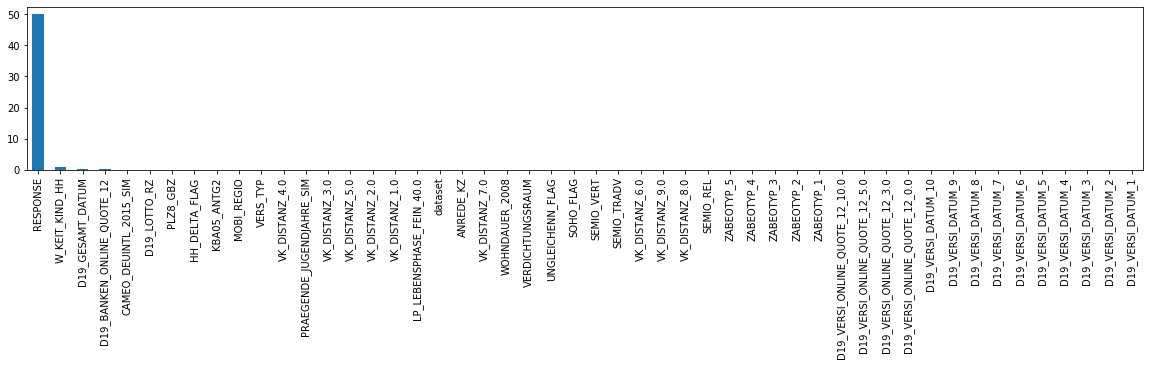

In [55]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

empty_cells = pd.DataFrame({'attribute':empty_cells.index, 'missingness':empty_cells})
#empty_cells = empty_cells[empty_cells['attribute']!='RESPONSE']
empty_cells

**a second round of imputation with frequency imputer**|

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'most_frequent')

original_responses = joint_dataset_imputed_df['RESPONSE']

joint_dataset_imputed_df = pd.DataFrame(imputer.fit_transform(joint_dataset_imputed_df),columns= joint_dataset_imputed_df.columns, index = joint_dataset_imputed_df.index)
joint_dataset_imputed_df['RESPONSE'] = original_responses




CPU times: user 366 ms, sys: 0 ns, total: 366 ms
Wall time: 365 ms


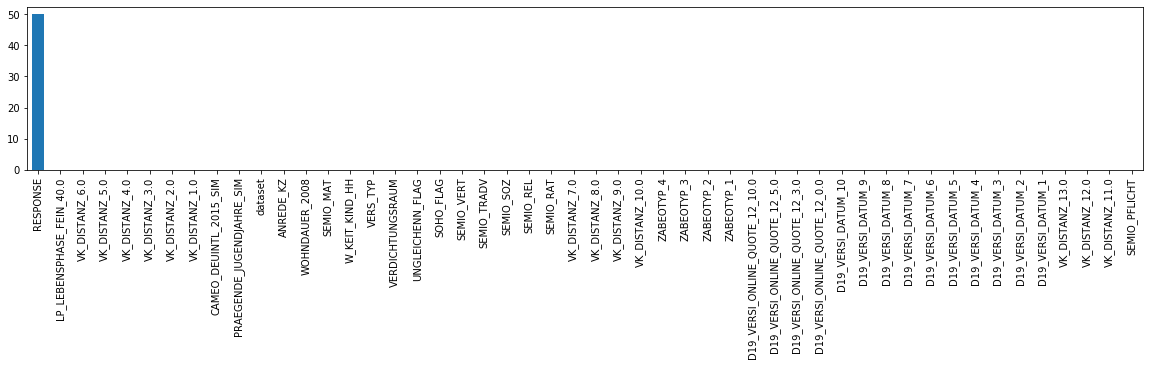

In [57]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

In [58]:
joint_dataset_imputed_df.to_csv("../arvato_data_processed/MAILOUTimputed.csv")

# RESPONSE variable
Before attempting any supervised learning method it might be worthwhile to notice the distribution of the target binary variable `RESPONSE`. We see that the feature is imbalanced, and this will influence subsequent modelling approaches, that abandon `accuracy` and focus on `ROC-AUC` approaches.

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([42430.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   532.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

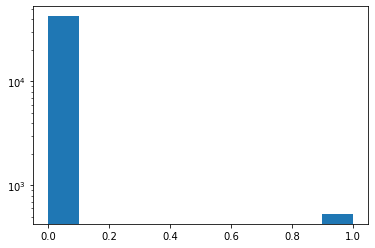

In [59]:
plt.hist(joint_dataset_imputed_df['RESPONSE'],log=True)